<h1> K- Nearest Neighbour (KNN) <h1>
<a href="https://huggingface.co/spaces/gracysapra1911/Mobile_Price_prediction_KNN">Gradio link</a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('knn.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
data['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


<Axes: >

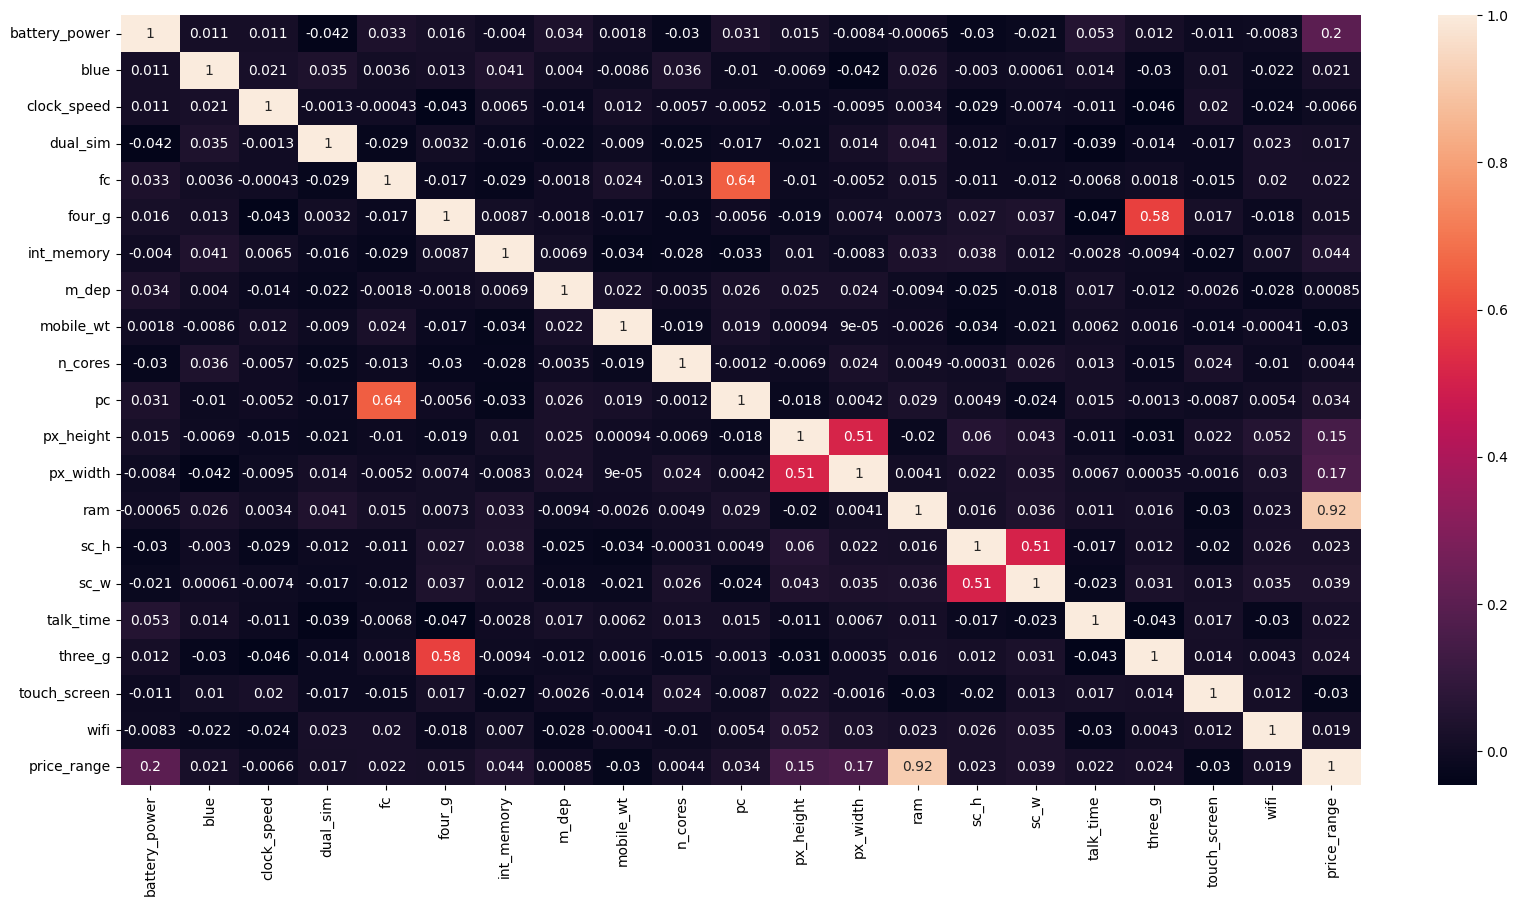

In [ ]:
# correlation using the heat map
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [ ]:
x= data.iloc[:, :-1].values
y= data.iloc[:, -1].values

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier= KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=1)
knnClassifier.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
y_pred = knnClassifier.predict(x_test)

[[ 94   1   0   0]
 [  2  86   4   0]
 [  0   4  90   5]
 [  0   0   9 105]]


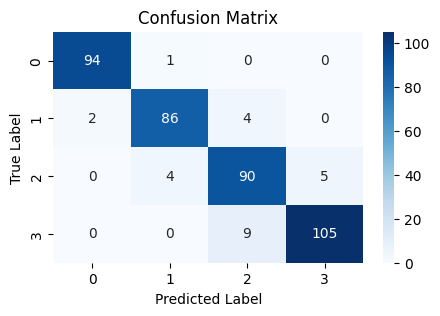

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)
print(cm)

# Visualizing Confusion Matrix
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9375


In [ ]:
# classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.95      0.93      0.94        92
           2       0.87      0.91      0.89        99
           3       0.95      0.92      0.94       114

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



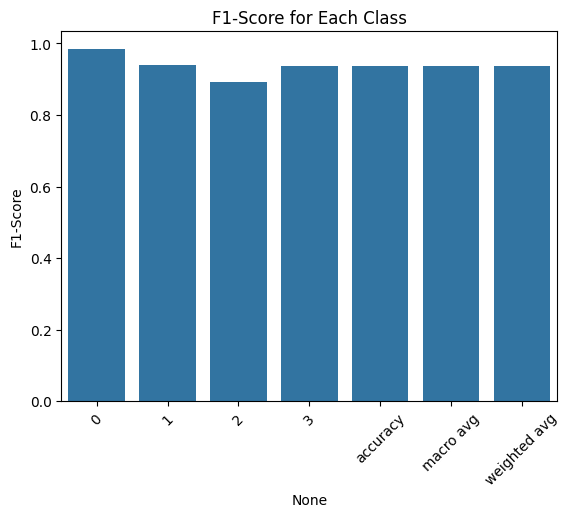

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.barplot(x=df_report.index, y='f1-score', data=df_report)
plt.title('F1-Score for Each Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import gradio as gr

<h2> Define the prediction function for Gradio

In [ ]:
def predict_price_range(battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi):
    # Prepare the input for prediction
    input_data = np.array([[battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi]])

    # Make prediction using the trained KNN model
    prediction = knnClassifier.predict(input_data)

    # Return the predicted price range
    price_ranges = ['Low', 'Medium', 'High', 'Very High']  # Modify this according to your dataset
    return f"Predicted Price Range: {price_ranges[prediction[0]]}"

# Create Gradio interface with all the features as inputs
interface = gr.Interface(
    fn=predict_price_range,  # Function that does the prediction
    inputs=[
        gr.Slider(500, 2000, step=1, label="Battery Power"),
        gr.Checkbox(label="Bluetooth"),
        gr.Slider(0.5, 3.0, step=0.1, label="Clock Speed"),
        gr.Checkbox(label="Dual SIM"),
        gr.Slider(0, 20, step=1, label="Front Camera (FC)"),
        gr.Checkbox(label="4G"),
        gr.Slider(4, 64, step=1, label="Internal Memory (GB)"),
        gr.Slider(0.1, 1.0, step=0.1, label="Mobile Depth (cm)"),
        gr.Slider(80, 250, step=1, label="Mobile Weight (g)"),
        gr.Slider(1, 8, step=1, label="Number of Cores"),
        gr.Slider(0, 20, step=1, label="Primary Camera (PC)"),
        gr.Slider(0, 1960, step=1, label="Pixel Height"),
        gr.Slider(500, 2000, step=1, label="Pixel Width"),
        gr.Slider(500, 4000, step=1, label="RAM"),
        gr.Slider(5, 20, step=1, label="Screen Height (cm)"),
        gr.Slider(0, 18, step=1, label="Screen Width (cm)"),
        gr.Slider(2, 20, step=1, label="Talk Time (hours)"),
        gr.Checkbox(label="3G"),
        gr.Checkbox(label="Touch Screen"),
        gr.Checkbox(label="WiFi"),
    ],
    outputs=gr.Textbox(label="Predicted Price Range"),  # Output format
    title="Mobile Price Range Prediction",
    description="Predict the price range of a mobile based on its specifications."
)

# Launch the Gradio app
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e69b634aebb16d7c97.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
